In [1]:
import numpy as np
import pandas as pd 
import torch as th
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [2]:
plt.style.use("seaborn-v0_8-notebook")

0 7.54
1 12.71
2 10.56
3 18.03
4 16.59
5 28.22
6 0.00
0 0.17
1 0.23
2 0.36
3 0.00


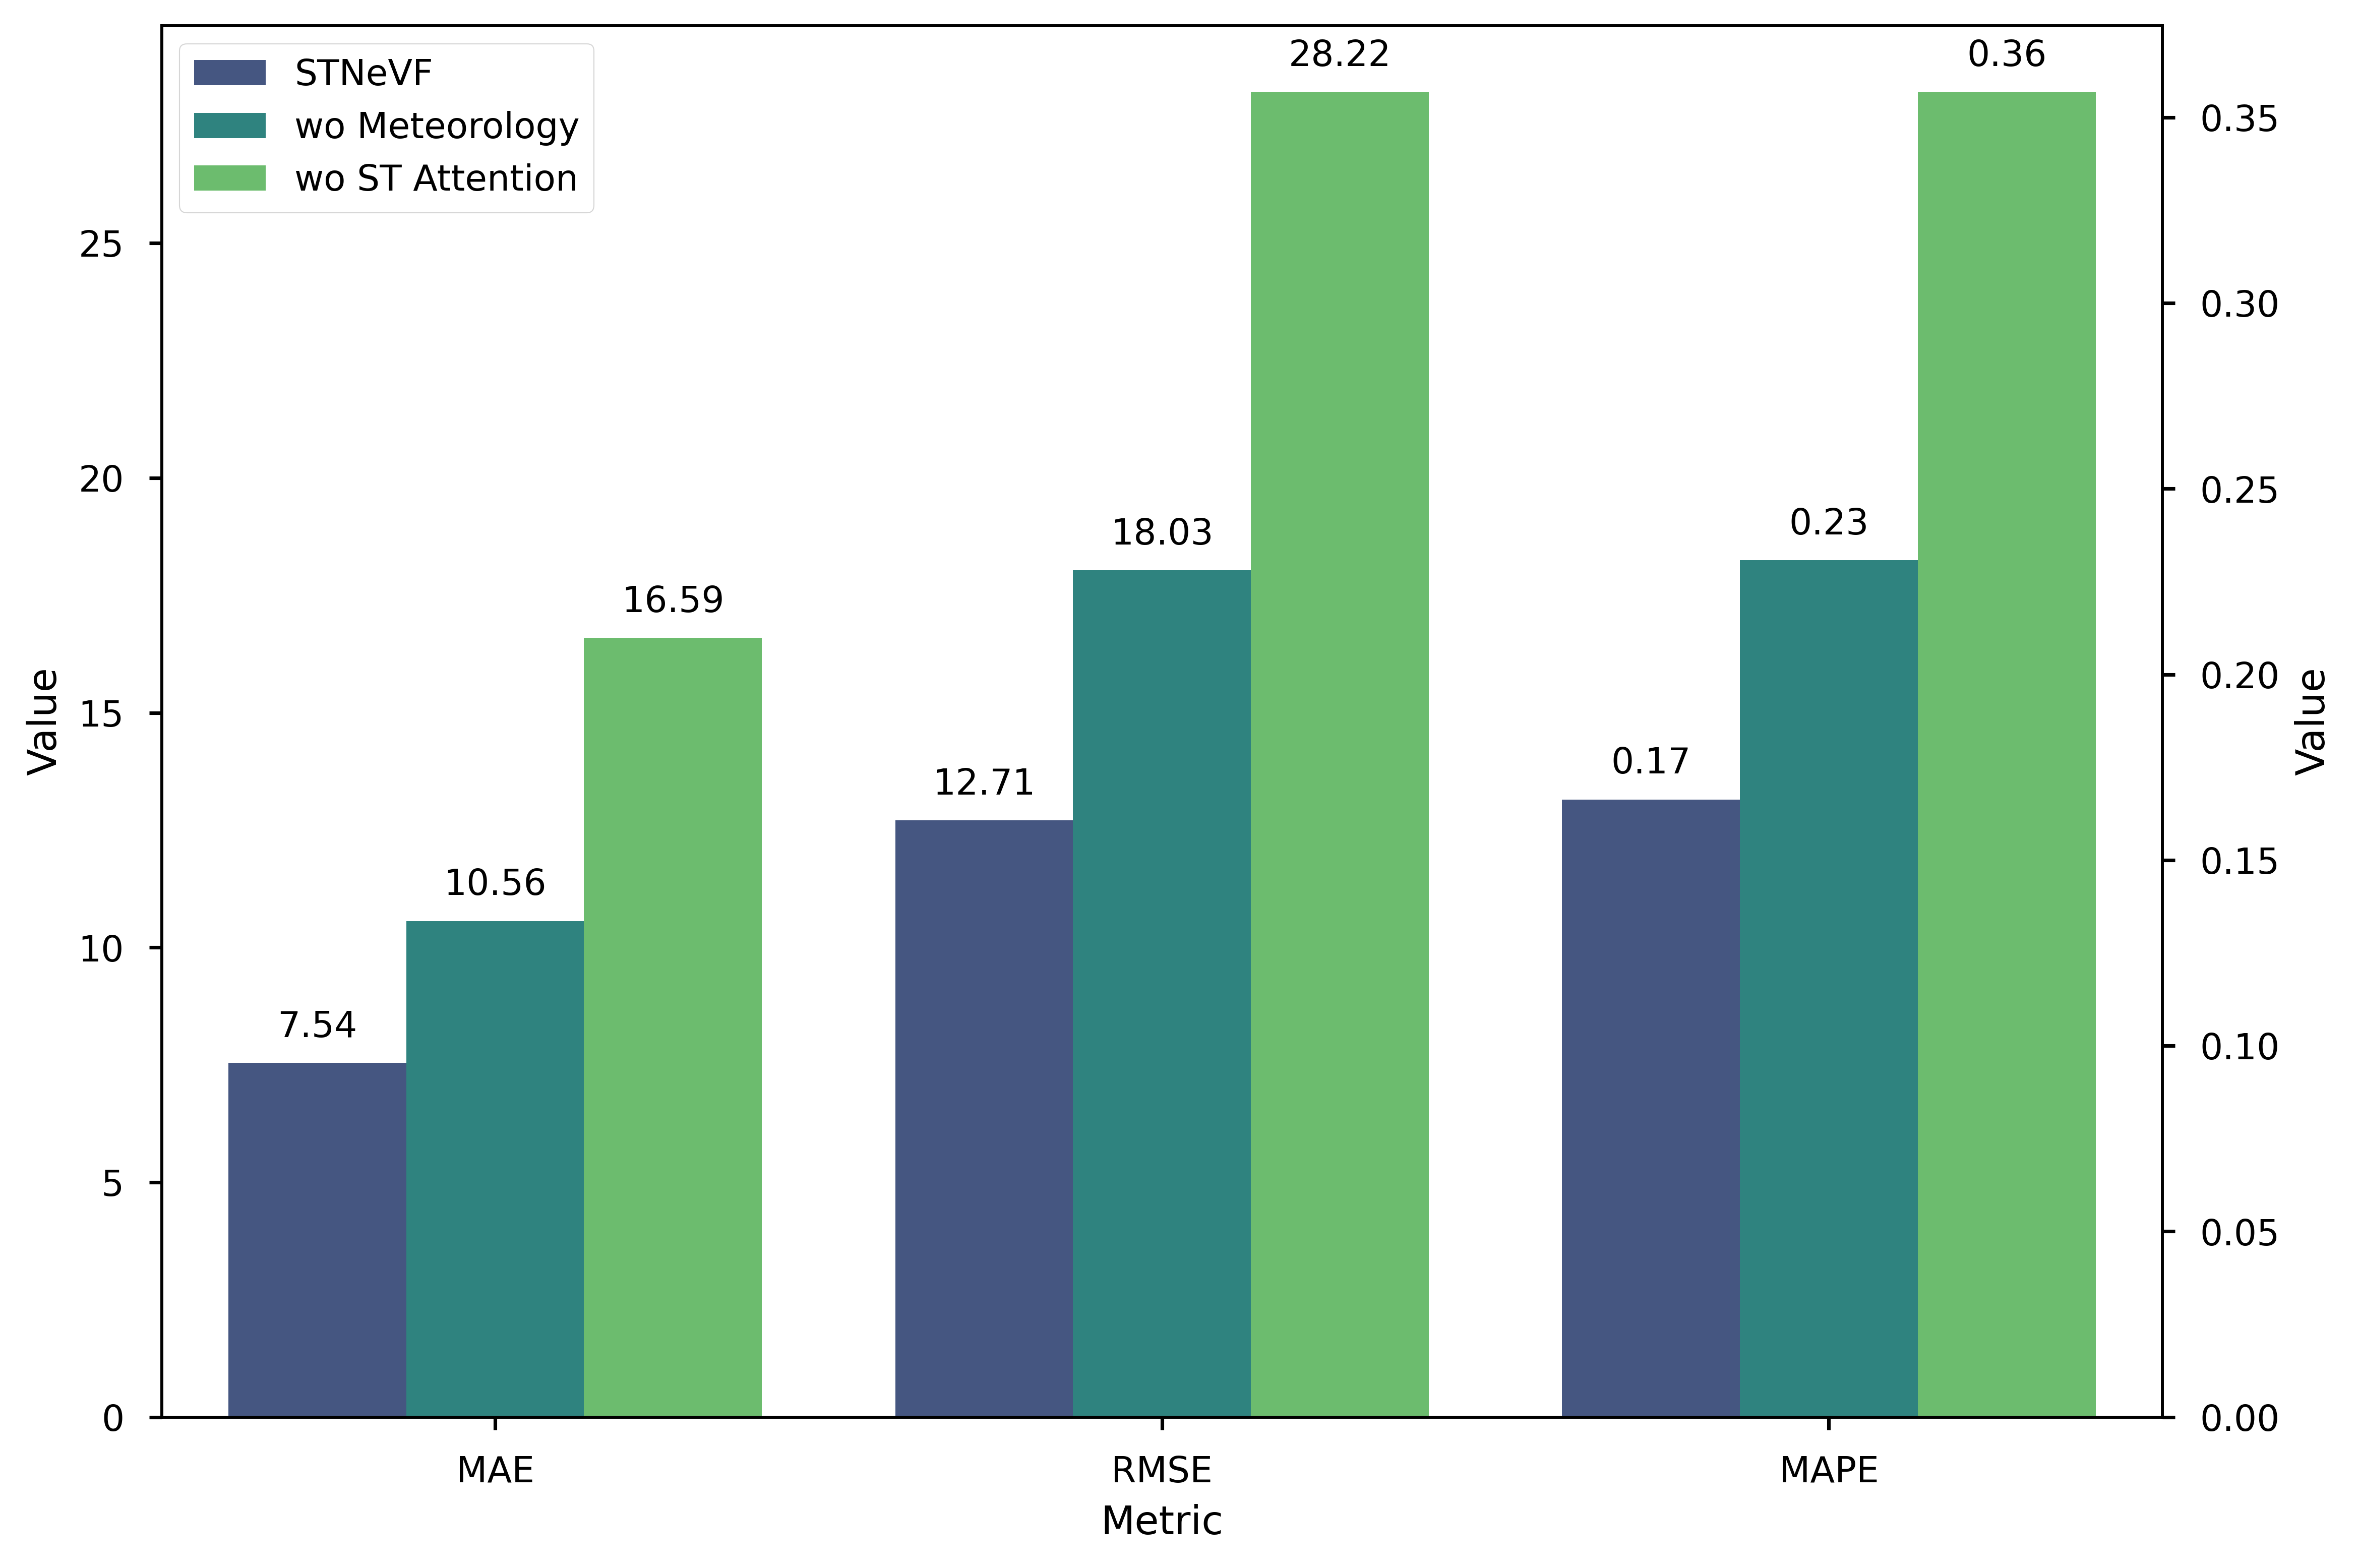

In [18]:
record_data = {
    "Metric": ["MAE", "MAPE", "RMSE"],
    "STNeVF": [7.539978, 0.166338, 12.706348],
    "wo Meteorology": [10.564407, 0.230747, 18.032305],
    "wo ST Attention": [16.590997, 0.356844, 28.219265],
}
df = pd.DataFrame(record_data)
# Melt数据框，将列名作为变量，保留Metric列
df_melted = pd.melt(df, id_vars=['Metric'],
                    var_name='Model', value_name='Value')

# 使用Seaborn绘制柱状图
# sns.set(style="whitegrid")
plt.figure(figsize=[10,7],dpi=512)

# 创建一个坐标轴
ax1 = sns.barplot(x='Metric', y='Value', hue='Model',
                  data=df_melted[df_melted['Metric'] != 'MAPE'], palette="viridis")

# 创建第二个坐标轴，共享x轴
ax2 = ax1.twinx()
sns.barplot(x='Metric', y='Value', hue='Model',
            data=df_melted[df_melted['Metric'] == 'MAPE'], ax=ax2, palette="viridis")
# 设置图例
ax1.legend(loc='upper left')
ax2.legend([], [], frameon=False)
for i,p in enumerate(ax1.patches):
    print(i,f'{p.get_height():.2f}')
    if i >= 6:
        break
    ax1.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    

# 在第二个坐标轴上显示MAPE的数字
for i, p in enumerate(ax2.patches):
    print(i, f'{p.get_height():.2f}')
    if i >= 3:
        break
    ax2.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# 显示图表
plt.savefig("ab_study.svg")
plt.show()

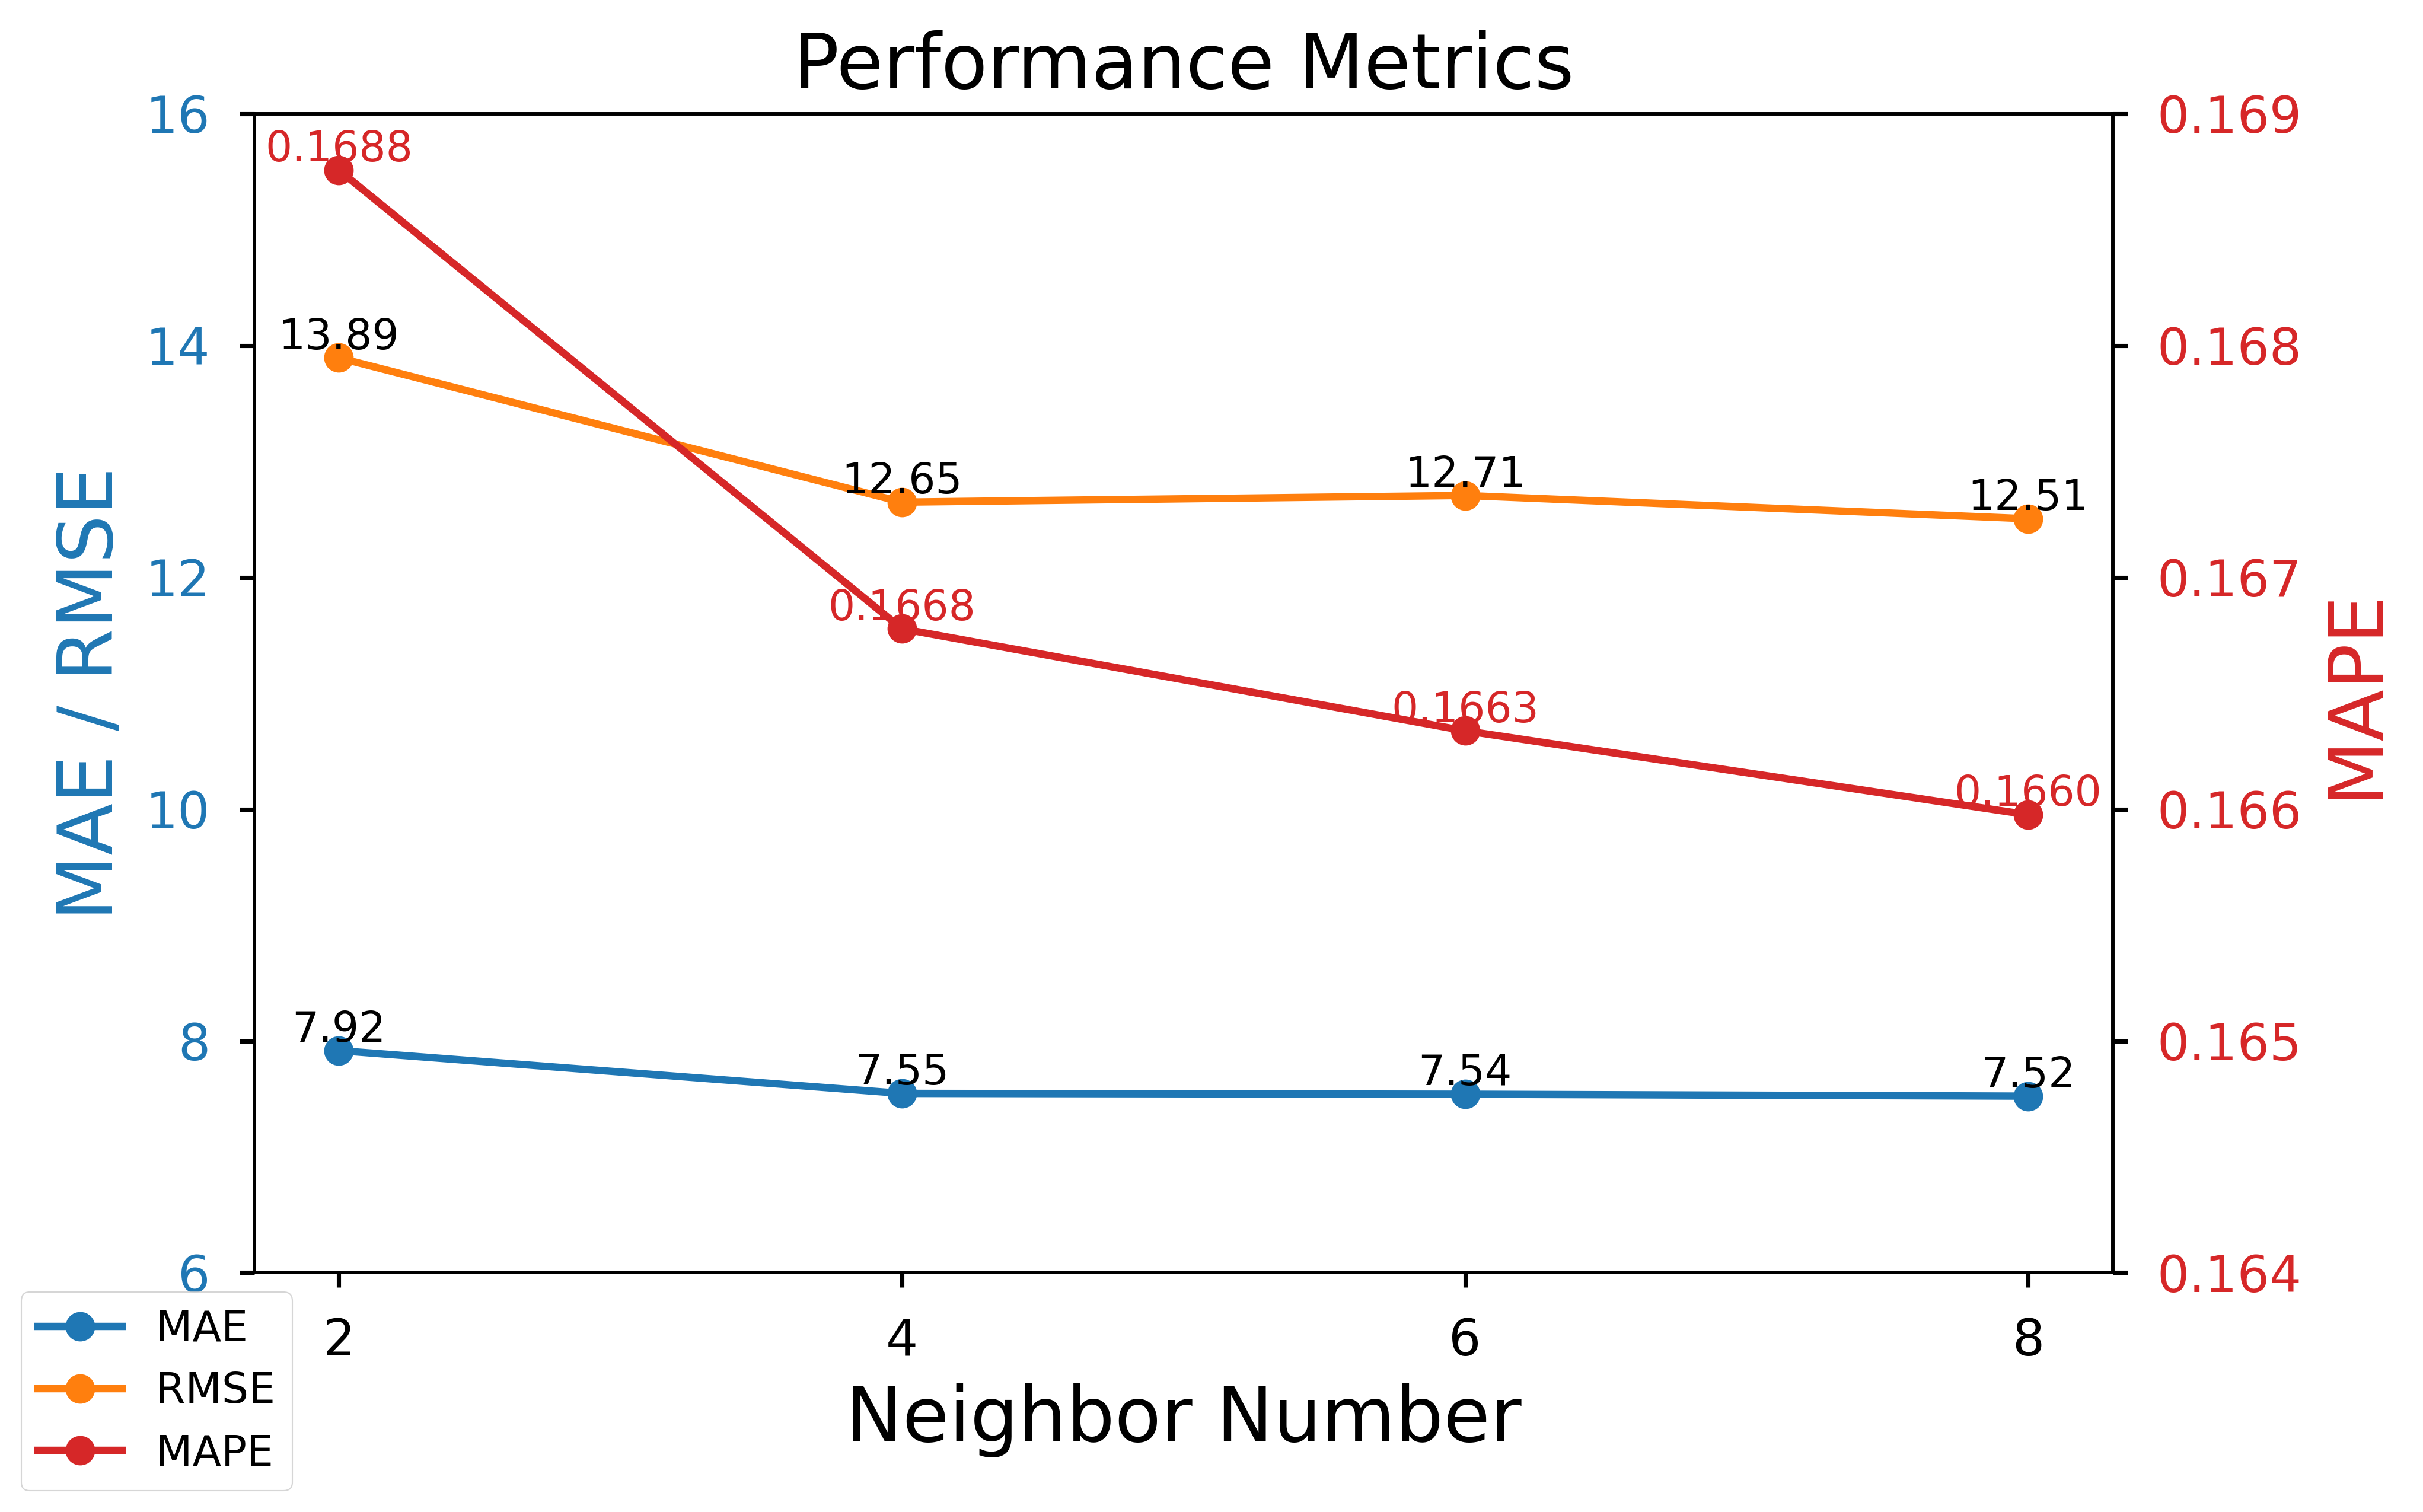

In [59]:
hp_data = {
    "2": [7.916591, 0.168757, 13.89392],
    "4": [7.547035, 0.166778, 12.648738],
    "6": [7.539978, 0.166338, 12.706348],
    "8": [7.523675, 0.165976, 12.505396]
}
hp_df = pd.DataFrame(hp_data)
hp_df.index = ["MAE", "MAPE", "RMSE"]
hp_df = hp_df.T
t_size = 18
n_size=14
fig, ax1 = plt.subplots(figsize=(8, 5), dpi=512)

# 绘制 MAE 和 RMSE
ax1.plot(hp_df.index, hp_df["MAE"], label="MAE", marker='o')
ax1.plot(hp_df.index, hp_df["RMSE"], label="RMSE", marker='o')

for i, value in enumerate(hp_df["MAE"]):
    ax1.text(hp_df.index[i], value, f'{value:.2f}', ha='center', va='bottom')

for i, value in enumerate(hp_df["RMSE"]):
    ax1.text(hp_df.index[i], value, f'{value:.2f}', ha='center', va='bottom')


# 添加标题和标签
ax1.set_title("Performance Metrics", fontsize=t_size)
ax1.set_xlabel("Neighbor Number", fontsize=t_size)
ax1.set_ylabel("MAE / RMSE", color='tab:blue', fontsize=t_size)
ax1.set_ylim((6, 16))
ax1.tick_params(axis='y', labelcolor='tab:blue')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# 创建次坐标轴
ax2 = ax1.twinx()

# 绘制 MAPE
ax2.plot(hp_df.index, hp_df["MAPE"], label="MAPE", color='tab:red', marker='o')
for i, value in enumerate(hp_df["MAPE"]):
    ax2.text(hp_df.index[i], value, f'{value:.4f}',
             ha='center', va='bottom', color='tab:red')

ax2.set_ylabel("MAPE", color='tab:red', fontsize=t_size)
ax2.set_ylim((0.1640, 0.1690))
ax2.tick_params(axis='y', labelcolor='tab:red')

# 添加图例
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
fig.tight_layout()
fig.legend(loc="lower left")
plt.savefig("hyper study.svg")
# 显示图形
plt.show()

In [11]:
hp_df

,2,4,6,8
MAE,7.916591,7.547035,7.539978,7.523675
MAPE,0.168757,0.166778,0.166338,0.161976
RMSE,13.893920,12.648738,12.706348,12.305396
